In [64]:
#Packages needed to run program
import requests
import pandas as pd
import json 
import pandas as pd 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#graph section
import networkx as nx


import numpy as np

%matplotlib inline

In [51]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize

tips = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/tip.json', 'r'):
    tips.append(json.loads(line))   

In [55]:
tips_df = pd.DataFrame(tips)

In [56]:
tips_df.head()

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [59]:
business = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/business.json', 'r'):
    business.append(json.loads(line))
business_df = pd.DataFrame(business)
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [60]:
review = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/review.json', 'r'):
    review.append(json.loads(line))
review_df = pd.DataFrame(review)
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [61]:
user = []
for line in open('/Users/ntlrsmllghn/Dropbox/Data/Data 620/Final/yelp_dataset/user.json', 'r'):
    user.append(json.loads(line))
user_df = pd.DataFrame(user)
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


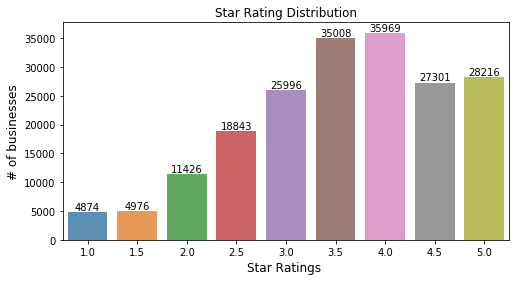

In [66]:
x=business_df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [83]:
business_cats = business_df['categories'].str.split(',', expand=True).rename(columns = lambda x: "string"+str(x+1))

pandas.core.frame.DataFrame